In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df['healthy'] = (df['calories'] < 120).astype(int)

features = ['calories', 'protein', 'fat']
X_raw = df[features]
y = df['healthy']

Multinomial Naive Bayes

In [3]:
scaler_mnb = MinMaxScaler()
X_mnb_scaled = scaler_mnb.fit_transform(X_raw)
X_mnb = np.round(X_mnb_scaled * 100)  

X_train_mnb, X_test_mnb, y_train, y_test = train_test_split(X_mnb, y, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
mnb_preds = mnb.predict(X_test_mnb)

mnb_acc = accuracy_score(y_test, mnb_preds)
mnb_cm = confusion_matrix(y_test, mnb_preds)

BernoulliNB

In [5]:
binarizer = Binarizer()
X_bin = binarizer.fit_transform(X_raw)
X_train_bnb, X_test_bnb, _, _ = train_test_split(X_bin, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train)
bnb_preds = bnb.predict(X_test_bnb)

bnb_acc = accuracy_score(y_test, bnb_preds)
bnb_cm = confusion_matrix(y_test, bnb_preds)

Gaussian Naive Bayes

In [4]:
X_train_gnb, X_test_gnb, _, _ = train_test_split(X_raw, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train)
gnb_preds = gnb.predict(X_test_gnb)

gnb_acc = accuracy_score(y_test, gnb_preds)
gnb_cm = confusion_matrix(y_test, gnb_preds)

MultinomialNB Accuracy: 0.74
GaussianNB Accuracy: 0.97
BernoulliNB Accuracy: 0.75


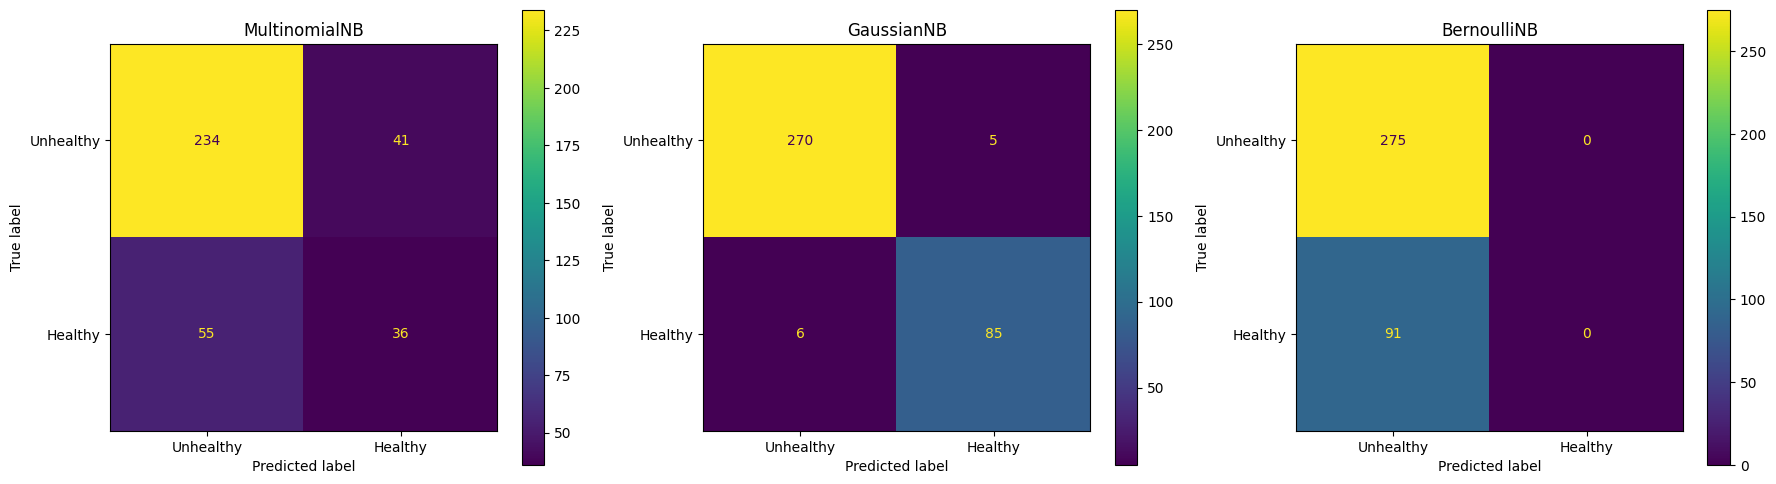

In [7]:
print(f"MultinomialNB Accuracy: {mnb_acc:.2f}")
print(f"GaussianNB Accuracy: {gnb_acc:.2f}")
print(f"BernoulliNB Accuracy: {bnb_acc:.2f}")

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
models = ['MultinomialNB', 'GaussianNB', 'BernoulliNB']
cms = [mnb_cm, gnb_cm, bnb_cm]

for i, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unhealthy', 'Healthy'])
    disp.plot(ax=axs[i], values_format='d')
    axs[i].set_title(models[i])

plt.tight_layout()
plt.show()

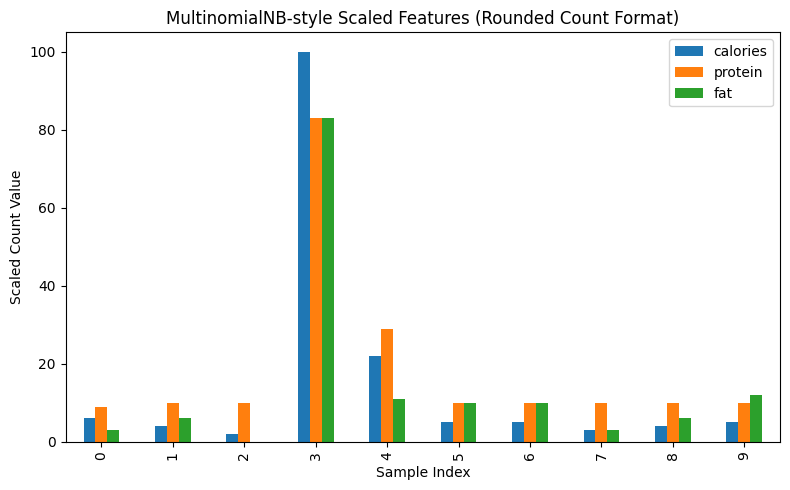

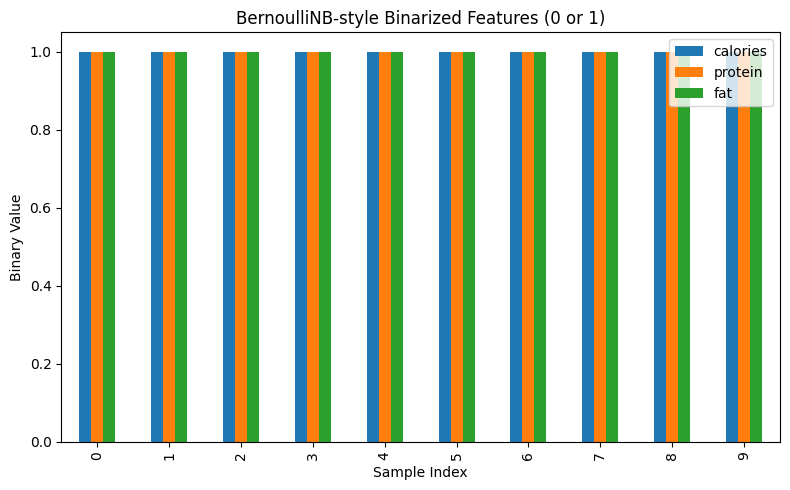

In [ ]:
df_selected = df[features].copy()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
df_scaled_count = (df_scaled * 100).round()

fig1, ax1 = plt.subplots(figsize=(8, 5))
df_scaled_count.head(10).plot(kind='bar', ax=ax1)
ax1.set_title("MultinomialNB-style Scaled Features (Rounded Count Format)")
ax1.set_ylabel("Scaled Count Value")
ax1.set_xlabel("Sample Index")
plt.tight_layout()

binarizer = Binarizer()
df_binarized = pd.DataFrame(binarizer.fit_transform(df_selected), columns=features)

fig2, ax2 = plt.subplots(figsize=(8, 5))
df_binarized.head(10).plot(kind='bar', ax=ax2)
ax2.set_title("BernoulliNB-style Binarized Features (0 or 1)")
ax2.set_ylabel("Binary Value")
ax2.set_xlabel("Sample Index")
plt.tight_layout()

plt.show()

In [ ]:
df['healthy'] = (df['calories'] < 120).astype(int)

X = df[features]
y = df['healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_df = X_train.copy()
train_df['healthy'] = y_train

test_df = X_test.copy()
test_df['healthy'] = y_test

# Display first few rows for screenshots
tools.display_dataframe_to_user(name="Training Set Sample", dataframe=train_df.head(10))
tools.display_dataframe_to_user(name="Testing Set Sample", dataframe=test_df.head(10))
